## Chapter4.5 ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数を定義

In [2]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xlim=(-1, 1), ylim=(-1, 1))
    return fig, ax


def plot_boundary(w):
    x = np.array(range(-2, 2))
    y = eval('%f*x + %f' % ((-w[1] / (w[2] + 1e-6)), (-w[0] / (w[2] + 1e-6))))
    plt.plot(x, y, linewidth=2)

データセットを作成

In [3]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset
dataset['y'] = dataset.y.apply(lambda x: 1 if x == 1 else -1)

パーセプトロンで学習

In [4]:
def train(dataset, epochs=1):
    learning_rate = 1.0
    w = np.array([0.0, 0.0, 1.0])  # 初期値
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            x = np.array([1.0, x0, x1])
            if y * np.dot(w, x) > 0:
                pass  # 合っているので何もしない
            else:
                w += learning_rate * y * x

    return w

[ 0.          1.48665224 -0.98906527]


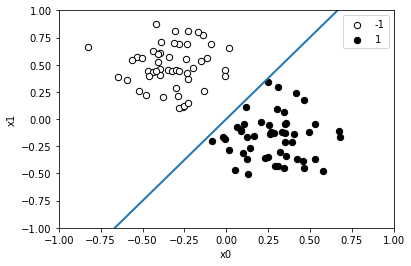

In [5]:
w = train(dataset=dataset,
          epochs=20)
print(w)
plot_dataset(dataset)
plot_boundary(w)

損失関数の勾配

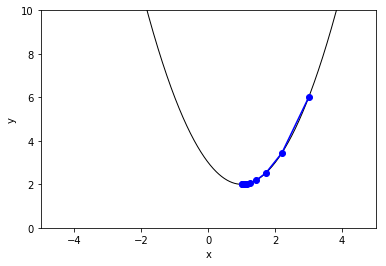

In [6]:
x = 3.0  # 探索開始初期値
learning_rate = 0.2  # 学習率
steps_x = [x]
steps_y = [(x - 1)**2 + 2]
for step in range(10):
    gradient = 2 * x - 2  # 勾配を計算
    x = x - learning_rate * gradient  # 勾配の値でxを修正

    steps_x.append(x)
    steps_y.append((x - 1)**2 + 2)

# 損失関数のプロット点を作成
loss_x = np.array(np.arange(-10, 10, 0.01))
loss_y = eval('(loss_x-1)**2 + 2')

# プロット領域を定義
plt.xlabel('x')      # X軸ラベル
plt.ylabel('y')      # Y軸ラベル
plt.xlim(-5, 5)      # X軸範囲
plt.ylim(0.0, 10.0)  # Y軸範囲

plt.plot(loss_x, loss_y, color='k', linewidth=1)  # 損失関数をプロット
plt.plot(steps_x, steps_y, '-bo')  # 探索点をプロット

↑　探索開始初期値や学習率を変えて実行し直してみてください

ロジスティック回帰

In [7]:
# ここからはラベルを0, 1のまま使う
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

ロジスティック回帰の損失関数に書き換える

In [8]:
def sigmoid(score):
    return 1 / (1 + np.exp(-score))


def train(dataset, epochs=1):
    learning_rate = 1.0
    w = np.array([0.0, 0.0, 1.0])  # 初期値
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            x = np.array([1.0, x0, x1])
            gradient = np.dot(x.T, y - sigmoid(np.dot(x, w)))

            w += learning_rate * gradient

    return w

[  2.96823312  23.05615366 -15.82559143]


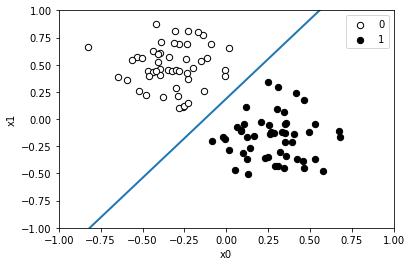

In [9]:
w = train(dataset=dataset,
          epochs=200)
print(w)
plot_dataset(dataset)
plot_boundary(w)